In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [2]:
file = 'http://bit.ly/mc_clean_data_usc'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,rude,trim_text,review_len,sentiment_polarity,sentiment_objectivity
0,1,im not a huge mcds lover but ive been to bette...,50,-0.328571,0.828571
1,1,terrible customer service came in at pm and st...,80,-0.257143,0.521429
2,0,first they lost my order actually they gave it...,156,0.093750,0.529167
3,0,i see im not the only one giving star only bec...,22,0.000000,1.000000
4,1,well its mcdonalds so you know what the food i...,143,-0.009361,0.437175


In [5]:
review_count = df[['trim_text','rude']].groupby(['rude'], as_index =False).count()
review_count

,rude,trim_text
0,0,1022
1,1,503


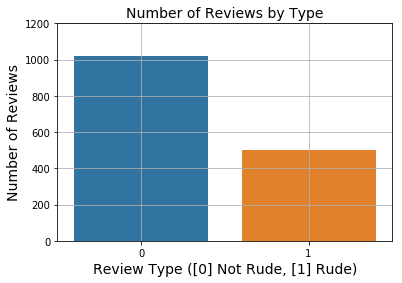

In [6]:
sns.barplot(review_count['rude'], review_count['trim_text'])
plt.grid(True)
plt.ylim(0, 1200, 250)
plt.xlabel('Review Type ([0] Not Rude, [1] Rude)', fontsize = 14)
plt.ylabel('Number of Reviews', fontsize = 14)
plt.title('Number of Reviews by Type', fontsize = 14)
plt.show()

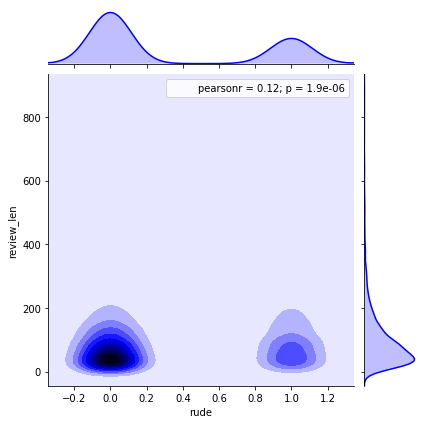

In [7]:
df_len = df[['rude', 'trim_text']].groupby(['trim_text'], as_index=False).mean()
plt.figure(figsize = (10, 10))
sns.jointplot(x=df["rude"], y=df["review_len"], kind='kde', color = 'b')
plt.show()

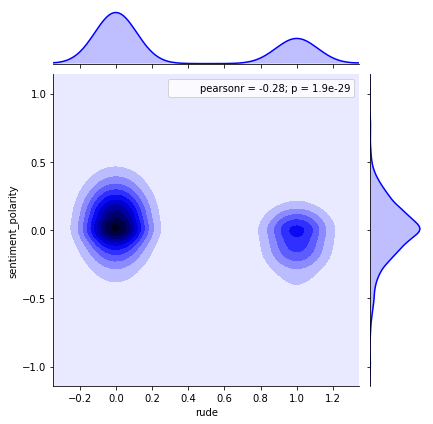

In [8]:
df_s_polarity = df[['rude', 'sentiment_polarity']].groupby(['sentiment_polarity'], as_index=False).mean()
plt.figure(figsize = (10, 10))
sns.jointplot(x=df["rude"], y=df["sentiment_polarity"], kind='kde', color = 'b')
plt.show()

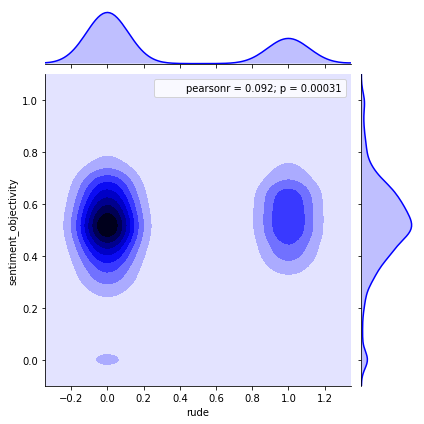

In [9]:
df_o_polarity = df[['rude', 'sentiment_objectivity']].groupby(['sentiment_objectivity'], as_index=False).mean()
plt.figure(figsize = (10, 10))
sns.jointplot(x=df["rude"], y=df["sentiment_objectivity"], kind='kde', color = 'b')
plt.show()

In [10]:
vect = CountVectorizer(stop_words='english', min_df=0.01, max_df=0.95)

In [11]:
X = df['trim_text']
y = df['rude']

X_dtm = vect.fit_transform(X)
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(X_dtm.toarray())
print('Size of Feature Vector is: ', len(X_dtm.toarray()[0]))

Size of Feature Vector is:  691


In [12]:
pca.explained_variance_ratio_

array([ 0.07351222,  0.03495783])

In [13]:
print('Total Variance', (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100, '%')

Total Variance 10.8470047769 %


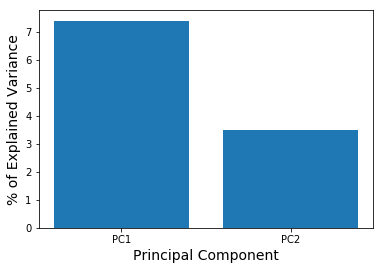

In [14]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 14)
plt.ylabel('% of Explained Variance', fontsize = 14)
plt.show()

In [15]:
pca_df = pd.DataFrame(pca_results, columns=['x', 'y'])
pca_df['review_len'] = df['review_len']
pca_df['review'] = df['trim_text']
pca_df['rude'] = df['rude']

pca_df.head()

,x,y,review_len,review,rude
0,-0.870981,-0.802581,50,im not a huge mcds lover but ive been to bette...,1
1,0.436833,-0.005722,80,terrible customer service came in at pm and st...,1
2,-0.167187,-1.632750,156,first they lost my order actually they gave it...,0
3,-1.586527,0.060094,22,i see im not the only one giving star only bec...,0
4,1.586893,0.472924,143,well its mcdonalds so you know what the food i...,1


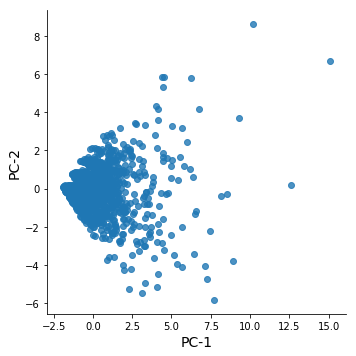

In [16]:
sns.lmplot( x="x", y="y", data=pca_df, fit_reg=False, legend=False)
plt.legend(loc='lower right')
plt.xlabel('PC-1', fontsize = 14)
plt.ylabel('PC-2', fontsize = 14)
plt.show()

In [17]:
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(X_dtm)

In [18]:
model = TSNE(learning_rate=90, perplexity=70, n_components=2, verbose=2)
transformed = model.fit_transform(X_reduced)

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1525 samples in 0.003s...
[t-SNE] Computed neighbors for 1525 samples in 0.266s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1525
[t-SNE] Computed conditional probabilities for sample 1525 / 1525
[t-SNE] Mean sigma: 0.956679
[t-SNE] Computed conditional probabilities in 0.104s
[t-SNE] Iteration 50: error = 60.3167038, gradient norm = 0.0333038 (50 iterations in 4.087s)
[t-SNE] Iteration 100: error = 60.3159637, gradient norm = 0.0302729 (50 iterations in 4.228s)
[t-SNE] Iteration 150: error = 60.3248367, gradient norm = 0.0560113 (50 iterations in 5.713s)
[t-SNE] Iteration 200: error = 60.3291969, gradient norm = 0.0650741 (50 iterations in 5.427s)
[t-SNE] Iteration 250: error = 60.3253326, gradient norm = 0.0591020 (50 iterations in 4.462s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.325333
[t-SNE] Iteration 300: error = 1.6928546, gradient norm = 0.0012911 (50 iterations in 4.451s

In [19]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['reveiw'] = df['trim_text']
tsne_df['rude'] = df['rude']
tsne_df.head()

,x,y,reveiw,rude
0,-6.135726,-6.306445,im not a huge mcds lover but ive been to bette...,1
1,-0.874323,8.095408,terrible customer service came in at pm and st...,1
2,-10.342860,-9.807547,first they lost my order actually they gave it...,0
3,2.870799,-6.258233,i see im not the only one giving star only bec...,0
4,-2.176938,13.181339,well its mcdonalds so you know what the food i...,1


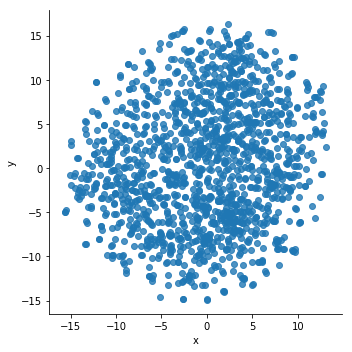

In [20]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, legend=False)
plt.legend(loc='lower right')
plt.show()

In [21]:
metric_ = []
silhouette_avg_ = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_dtm)
    metric_.append(kmeans.inertia_)
    labels = kmeans.predict(X_dtm)
    silhouette_avg = silhouette_score(X_dtm, labels)
    silhouette_avg_.append(silhouette_avg)

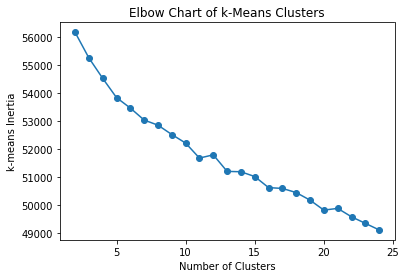

In [22]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, metric_)
plt.plot(cluster, metric_)
plt.ylabel('k-means Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow Chart of k-Means Clusters')
plt.show()

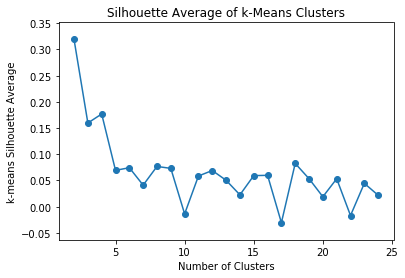

In [23]:
cluster = [x for x in range(2, 25)]
plt.scatter(cluster, silhouette_avg_)
plt.plot(cluster, silhouette_avg_)
plt.ylabel('k-means Silhouette Average')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Average of k-Means Clusters')
plt.show()

In [32]:
X_dtm = vect.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(X_dtm)
labels = kmeans.predict(X_dtm)
labels

array([1, 0, 1, ..., 0, 3, 1], dtype=int32)

In [33]:
kmeans_df = pd.DataFrame()
kmeans_df['review'] = df['trim_text']
kmeans_df['rude'] = df['rude']
kmeans_df['Cluster'] = labels
kmeans_df.head(10)

,review,rude,Cluster
0,im not a huge mcds lover but ive been to bette...,1,1
1,terrible customer service came in at pm and st...,1,0
2,first they lost my order actually they gave it...,0,1
3,i see im not the only one giving star only bec...,0,1
4,well its mcdonalds so you know what the food i...,1,0
5,this has to be one of the worst and slowest mc...,0,1
6,im not crazy about this mcdonalds î¾this is pr...,0,0
7,one star and im beng kind i blame management l...,1,2
8,never been upset about any fast food drive thr...,1,3
9,this mcdonalds has gotten much better usually ...,0,0


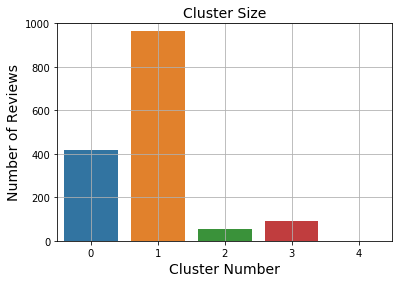

In [35]:
cluster_df = kmeans_df[['Cluster', 'review']].groupby(['Cluster'], as_index=False).count()
sns.barplot(cluster_df['Cluster'], cluster_df['review'])
plt.grid(True)
plt.ylim(0, 1000, 100)
plt.xlabel('Cluster Number', fontsize = 14)
plt.ylabel('Number of Reviews', fontsize = 14)
plt.title('Cluster Size', fontsize = 14)
plt.show()

In [36]:
model = TSNE(learning_rate=200, perplexity=50)
transformed = model.fit_transform(X_dtm.toarray())

In [37]:
tsne_df = pd.DataFrame(transformed, columns=['x', 'y'])
tsne_df['Cluster'] = kmeans_df['Cluster']
tsne_df['trim_text'] = df['trim_text']

In [38]:
tsne_df.head()

,x,y,Cluster,trim_text
0,0.238576,2.945589,1,im not a huge mcds lover but ive been to bette...
1,3.892577,-3.663844,0,terrible customer service came in at pm and st...
2,-2.728943,3.105609,1,first they lost my order actually they gave it...
3,0.017737,0.296502,1,i see im not the only one giving star only bec...
4,3.274648,0.243847,0,well its mcdonalds so you know what the food i...


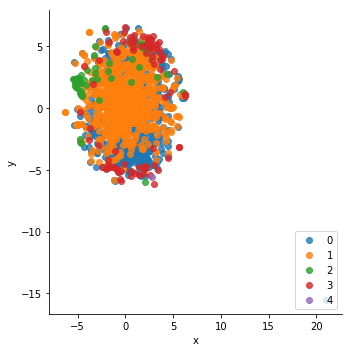

In [39]:
plt.figure(figsize=(20,10))
sns.lmplot( x="x", y="y", data=tsne_df, fit_reg=False, hue='Cluster', legend=False)
plt.legend(loc='lower right')
plt.show()